# Statistical Analysis

Hypothesis Tests

1. Chi-Square Test
2. Yet to be determined other hypothesis test
3. Another yet to be determined hypothesis test

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chi-Square Test - Race & Gender
---
- **Null Hypothesis:** There is no statistically significant relationship between sex and the number of tickets issued
- **Alternative Hypothesis:** There is a significant relationship betweeen sex and the number of tickets issued

In [49]:
data = pd.read_csv('data/Traffic_Violations (4).csv', low_memory = False)

In [50]:
data.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [51]:
data.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [52]:
data.Alcohol.value_counts()

No     1612607
Yes       2333
Name: Alcohol, dtype: int64

In [53]:
data.Gender.value_counts()

M    1081580
F     531186
U       2174
Name: Gender, dtype: int64

In [54]:
# We are comparing 2 variables, so we will drop all Gender counts with 'U' which I'm assuming means unknown
data = data[data.Gender != 'U']

In [55]:
data.Gender.value_counts()

M    1081580
F     531186
Name: Gender, dtype: int64

In [56]:
# groupby Gender and then get Race
# We will construct a contigency table out of this
data.groupby('Gender').Race.value_counts()

Gender  Race           
F       WHITE              212465
        BLACK              172393
        HISPANIC            80046
        ASIAN               36562
        OTHER               28684
        NATIVE AMERICAN      1036
M       WHITE              356819
        BLACK              339753
        HISPANIC           266071
        OTHER               59017
        ASIAN               57714
        NATIVE AMERICAN      2206
Name: Race, dtype: int64

In [57]:
contingency_table = pd.crosstab(data['Gender'], 
                              data['Race'], 
                              margins = True
                              )

In [58]:
contingency_table

Race,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,OTHER,WHITE,All
Gender,,,,,,,
F,36562,172393,80046,1036,28684,212465,531186
M,57714,339753,266071,2206,59017,356819,1081580
All,94276,512146,346117,3242,87701,569284,1612766


### Visuializing Contigency Table with Stacked Bar Chart

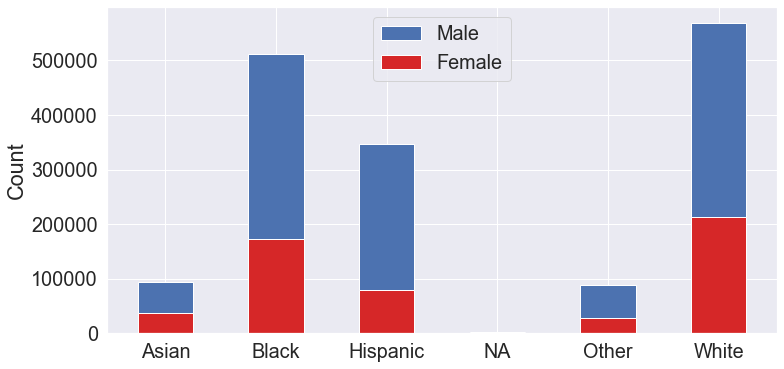

In [59]:
#Assigns the frequency values
malecount = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(12, 6))
sns.set(font_scale=1.8)
categories = ["Asian","Black","Hispanic","NA","Other", "White"]
p1 = plt.bar(categories, malecount, 0.50, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.50, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('')
plt.ylabel('Count')
plt.show()

**The chart above visuializes our data.  If there was truly no relationship between Gender, Race, and the amount of traffic ciations, then the data would show an even ratio split between 'Male' and 'Female' for each category.**  
**NA - Native American**

In [13]:
f_obs = np.append(contingency_table.iloc[0][0:6].values, contingency_table.iloc[1][0:6].values)
f_obs

array([ 36562, 172393,  80046,   1036,  28684, 212465,  57714, 339753,
       266071,   2206,  59017, 356819], dtype=int64)

In [14]:
row_sums = contingency_table.iloc[0:2,6].values
row_sums


array([ 531186, 1081580], dtype=int64)

In [15]:
col_sums = contingency_table.iloc[2,0:6].values
col_sums

array([ 94276, 512146, 346117,   3242,  87701, 569284], dtype=int64)

In [16]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[31051.058452373127,
 168682.11827134254,
 113998.25192371367,
 1067.7959555198956,
 28885.49447719012,
 187501.28091986067,
 63224.94154762687,
 343463.88172865746,
 232118.74807628634,
 2174.2040444801046,
 58815.50552280988,
 381782.71908013936]

In [17]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 21617.90298907573


In [18]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 5


In [19]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[ 36562, 172393,  80046,   1036,  28684, 212465],
       [ 57714, 339753, 266071,   2206,  59017, 356819]], dtype=int64)

In [20]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(21617.90298907573, 0.0, 5)

### **Conclusion**
- **With a p-value of <0.05, we reject the null hypothesis and accept our alternative hypothesis.**
- **There is definitely some sort of relationship between Gender and Race when being pulled over.  We don't know what this relationship is, but we do know that these two variables are not independent of each other**

# Chi-Square Test
---

In [60]:
data.Gender.value_counts()

M    1081580
F     531186
Name: Gender, dtype: int64

In [61]:
data.Race.value_counts(normalize = True)

WHITE              0.352986
BLACK              0.317558
HISPANIC           0.214611
ASIAN              0.058456
OTHER              0.054379
NATIVE AMERICAN    0.002010
Name: Race, dtype: float64

In [62]:
data.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [63]:
data['Search Arrest Reason'].value_counts()

Stop         29883
Search       10248
Other         5419
Warrant       2503
Traffic         23
DUI              7
Marihuana        5
Criminal         3
DWI              2
Name: Search Arrest Reason, dtype: int64

In [64]:
data.groupby('Gender')['Fatal'].value_counts()

Gender  Fatal
F       No        531052
        Yes          134
M       No       1081347
        Yes          233
Name: Fatal, dtype: int64

In [65]:
data.groupby('Gender')['Violation Type'].value_counts()

Gender  Violation Type
F       Warning           295587
        Citation          211468
        ESERO              23883
        SERO                 248
M       Warning           513888
        Citation          513616
        ESERO              53425
        SERO                 651
Name: Violation Type, dtype: int64

In [66]:
contingency_table = pd.crosstab(
                        data['Gender'],
                        data['Violation Type'],
                        margins = True
)
contingency_table

Violation Type,Citation,ESERO,SERO,Warning,All
Gender,,,,,
F,211468,23883,248,295587,531186
M,513616,53425,651,513888,1081580
All,725084,77308,899,809475,1612766


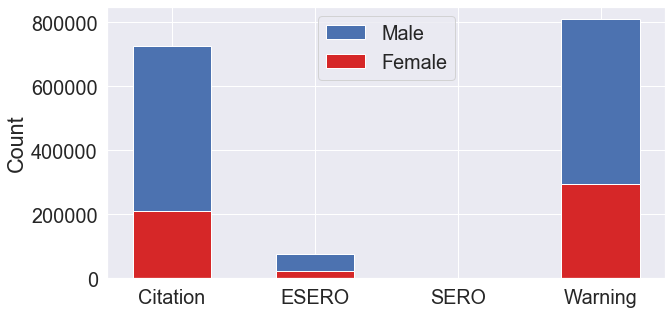

In [69]:
#Assigns the frequency values
malecount = contingency_table.iloc[0][0:4].values
femalecount = contingency_table.iloc[1][0:4].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["Citation","ESERO","SERO","Warning"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [70]:
f_obs = np.append(contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values)
f_obs

array([211468,  23883,    248, 295587, 513616,  53425,    651, 513888],
      dtype=int64)

In [71]:
row_sums = contingency_table.iloc[0:2,4].values
row_sums

array([ 531186, 1081580], dtype=int64)

In [72]:
col_sums = contingency_table.iloc[2,0:4].values
col_sums

array([725084,  77308,    899, 809475], dtype=int64)

In [73]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[238816.08963978654,
 25462.421261360916,
 296.09764466760834,
 266611.3914541849,
 486267.9103602134,
 51845.57873863908,
 602.9023553323917,
 542863.6085458151]

In [74]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 9523.275129849353


In [75]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 3


In [76]:
f_obs = np.array([contingency_table.iloc[0][0:4].values,
                  contingency_table.iloc[1][0:4].values])
f_obs

array([[211468,  23883,    248, 295587],
       [513616,  53425,    651, 513888]], dtype=int64)

In [77]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]


(9523.275129849353, 0.0, 3)